In [71]:
#libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

In [72]:
data = np.loadtxt('hw7_q4.csv', delimiter=",", dtype=float)
x = data[:,:2]
y = data[:,2]
n = len(data)

In [73]:
#define objective functions, confusion matrix functions
X = np.column_stack((np.ones(n), x))
def crossentropy_loss(w):
    loss = y.T @ np.log(1 + np.exp(-w @ X.T)) + (1 - y).T @ np.log(1 + np.exp(w @ X.T))
    return loss
def MSE_loss(w):
    loss = np.linalg.norm(y - X @ w)**2
    return loss
def cmval(X, w, y, c, n):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(n):
        if ((X @ w)[i] < c):
            if (y[i] == 0):
                tn+=1
            else:
                fn+=1
        elif ((X @ w)[i] > c):
            if (y[i] == 1):
                tp+=1
            else:
                fp+=1
    return tp, fp, tn, fn

In [74]:
#minimize cross entropy loss 
res1 = minimize(crossentropy_loss, [0,0,0], method='BFGS', options={'disp': True})
w1 = res1.x
cmval(X,w1,y,0,n)

Optimization terminated successfully.
         Current function value: 44.674623
         Iterations: 8
         Function evaluations: 44
         Gradient evaluations: 11


(45, 9, 41, 5)

In [75]:
#minimize MSE loss
res2 = minimize(MSE_loss, [0,0,0], method='BFGS', options={'disp': True})
w2 = res2.x
cmval(X,w2,y,0,n)

Optimization terminated successfully.
         Current function value: 15.073670
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7


(50, 45, 5, 0)

In [76]:
nv = 100
xval = np.linspace(-10,10,nv)
x1,x2 = np.meshgrid(xval,xval)

In [77]:
cel = np.zeros((nv,nv))
for i in range(nv):
    for j in range(nv):
        cel[i,j] = crossentropy_loss(np.stack([-0.3140706, x1[i,j], x2[i,j]]))
msel = np.zeros((nv,nv))
for i in range(nv):
    for j in range(nv):
        msel[i,j] = MSE_loss(np.stack([0.46021609, x1[i,j], x2[i,j]]))

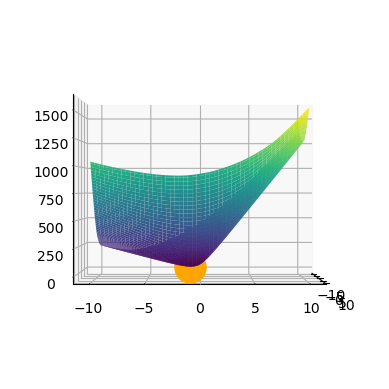

In [78]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1, x2, cel, cmap=cm.viridis,linewidth=0)
ax.scatter(w1[1],w1[2],crossentropy_loss(w1),s=500, color="orange")
ax.view_init(0, 0)

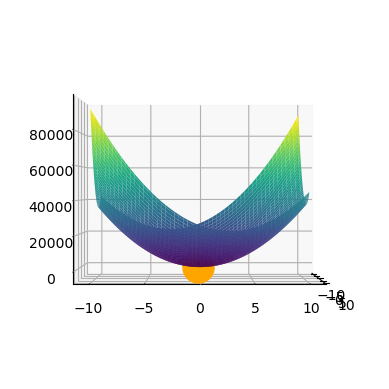

In [79]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1, x2, msel, cmap=cm.viridis,linewidth=0)
ax.scatter(w2[1],w2[2],MSE_loss(w2),s=500, color="orange")
ax.view_init(0, 0)

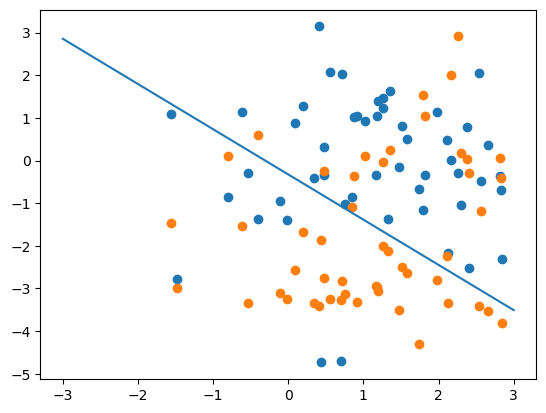

In [80]:
#plot stuff
plt.scatter(x[0:50,0], x[0:50,1])
plt.scatter(x[0:50,0], x[50:100,1])
xvalues = np.linspace(-3,3,100)
plt.plot(xvalues, -(w1[0] + w1[1] * xvalues) / w1[2])

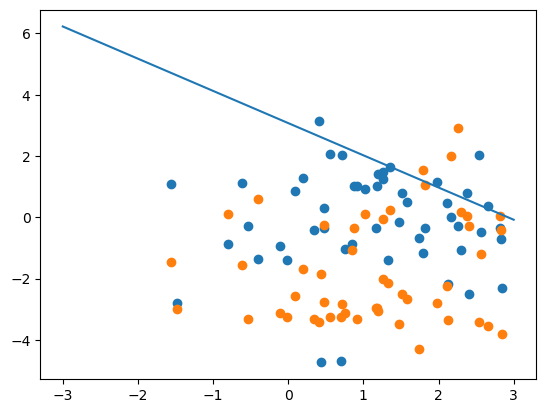

In [81]:
#plot stuff
plt.scatter(x[0:50,0], x[0:50,1])
plt.scatter(x[0:50,0], x[50:100,1])
xvalues = np.linspace(-3,3,100)
plt.plot(xvalues, -(w2[0] + w2[1] * xvalues) / w2[2])

In [69]:
ximbalance = x[0:60]
yimbalance = y[0:60]

Ximbalance = np.column_stack([np.ones(60), ximbalance])
def crossentropy_loss(w):
    loss = yimbalance.T @ np.log(1 + np.exp(-w @ Ximbalance.T)) + (1 - yimbalance).T @ np.log(1 + np.exp(w @ Ximbalance.T))
    return loss
def MSE_loss(w):
    loss = np.linalg.norm(yimbalance - Ximbalance @ w)**2
    return loss

#minimize cross entropy loss 
res1imbalance = minimize(crossentropy_loss, [0,0,0], method='BFGS', options={'disp': True})
w1imbalance = res1imbalance.x

#minimize MSE loss
res2imbalance = minimize(MSE_loss, [0,0,0], method='BFGS', options={'disp': True})
w2imbalance = res2imbalance.x

Optimization terminated successfully.
         Current function value: 10.926189
         Iterations: 18
         Function evaluations: 84
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 4.925086
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7


In [82]:
cmval(Ximbalance,w1imbalance,yimbalance,0,60)

(8, 2, 48, 2)

In [83]:
cmval(Ximbalance,w2imbalance,yimbalance,0,60)

(10, 33, 17, 0)